In [59]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
!pip install mysql-connector-python sqlalchemy pymysql





  Using cached mysql_connector_python-9.2.0-cp312-cp312-win_amd64.whl.metadata (6.2 kB)
  Using cached PyMySQL-1.1.1-py3-none-any.whl.metadata (4.4 kB)
Using cached mysql_connector_python-9.2.0-cp312-cp312-win_amd64.whl (16.1 MB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.1 MB 2.8 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 3.1 MB/s eta 0:00:01
   ----------------------------- ---------- 1.6/2.1 MB 2.9 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 2.3 MB/s eta 0:00:00
Using cached PyMySQL-1.1.1-py3-none-any.whl (44 kB)


In [63]:
import pandas as pd
from sqlalchemy import create_engine
import mysql.connector

In [41]:
csv_files=[file for file in os.listdir() if file.endswith(".csv")]
print(f"Found {len(csv_files)} CSV files: {csv_files}")
df1=pd.read_csv("paris_weekdays.csv")
df1.tail()

Found 20 CSV files: ['amsterdam_weekdays.csv', 'amsterdam_weekends.csv', 'athens_weekdays.csv', 'athens_weekends.csv', 'barcelona_weekdays.csv', 'barcelona_weekends.csv', 'berlin_weekdays.csv', 'berlin_weekends.csv', 'budapest_weekdays.csv', 'budapest_weekends.csv', 'lisbon_weekdays.csv', 'lisbon_weekends.csv', 'london_weekdays.csv', 'london_weekends.csv', 'paris_weekdays.csv', 'paris_weekends.csv', 'rome_weekdays.csv', 'rome_weekends.csv', 'vienna_weekdays.csv', 'vienna_weekends.csv']


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
3125,3125,231.615248,Entire home/apt,False,False,4.0,False,0,0,10.0,98.0,1,3.558773,0.154750,185.488125,9.029499,474.358260,27.873072,2.40050,48.85093
3126,3126,223.692795,Entire home/apt,False,False,2.0,False,1,0,9.0,89.0,1,4.205210,0.253034,172.658783,8.404971,406.585538,23.890778,2.40100,48.87700
3127,3127,567.853481,Entire home/apt,False,False,6.0,True,0,0,10.0,96.0,3,4.312136,0.304642,178.222781,8.675825,420.726229,24.721678,2.39334,48.88463
3128,3128,200.391462,Entire home/apt,False,False,2.0,True,0,0,9.0,93.0,1,2.891206,0.240686,235.168523,11.447924,602.451547,35.399774,2.38200,48.87400
3129,3129,301.286234,Entire home/apt,False,False,2.0,False,0,0,10.0,92.0,1,3.469721,0.508493,200.639467,9.767062,478.992836,28.145397,2.39992,48.85886


In [11]:
df=[pd.read_csv(file) for file in csv_files]
combine_df=pd.concat(df,ignore_index=True)
combine_df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [20]:
combine_df.shape

(51707, 20)

In [25]:
combine_df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')

In [26]:
combine_df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [28]:
combine_df.isnull().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [29]:
combine_df.describe

<bound method NDFrame.describe of        Unnamed: 0     realSum        room_type  room_shared  room_private  \
0               0  194.033698     Private room        False          True   
1               1  344.245776     Private room        False          True   
2               2  264.101422     Private room        False          True   
3               3  433.529398     Private room        False          True   
4               4  485.552926     Private room        False          True   
...           ...         ...              ...          ...           ...   
51702        1794  715.938574  Entire home/apt        False         False   
51703        1795  304.793960  Entire home/apt        False         False   
51704        1796  637.168969  Entire home/apt        False         False   
51705        1797  301.054157     Private room        False          True   
51706        1798  133.230489     Private room        False          True   

       person_capacity  host_is_superhost

In [31]:
combine_df.describe(include="object")

,room_type
count,51707
unique,3
top,Entire home/apt
freq,32648


In [32]:
missing_values = (combine_df.isnull().sum() / len(combine_df)) * 100
print(missing_values)

Unnamed: 0                    0.0
realSum                       0.0
room_type                     0.0
room_shared                   0.0
room_private                  0.0
person_capacity               0.0
host_is_superhost             0.0
multi                         0.0
biz                           0.0
cleanliness_rating            0.0
guest_satisfaction_overall    0.0
bedrooms                      0.0
dist                          0.0
metro_dist                    0.0
attr_index                    0.0
attr_index_norm               0.0
rest_index                    0.0
rest_index_norm               0.0
lng                           0.0
lat                           0.0
dtype: float64


In [34]:
combine_df.duplicated().sum()

0

In [38]:
combine_df.rename(columns={"Unnamed: 0":"Serial No"},inplace=True)
combine_df.head()

,Serial No,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


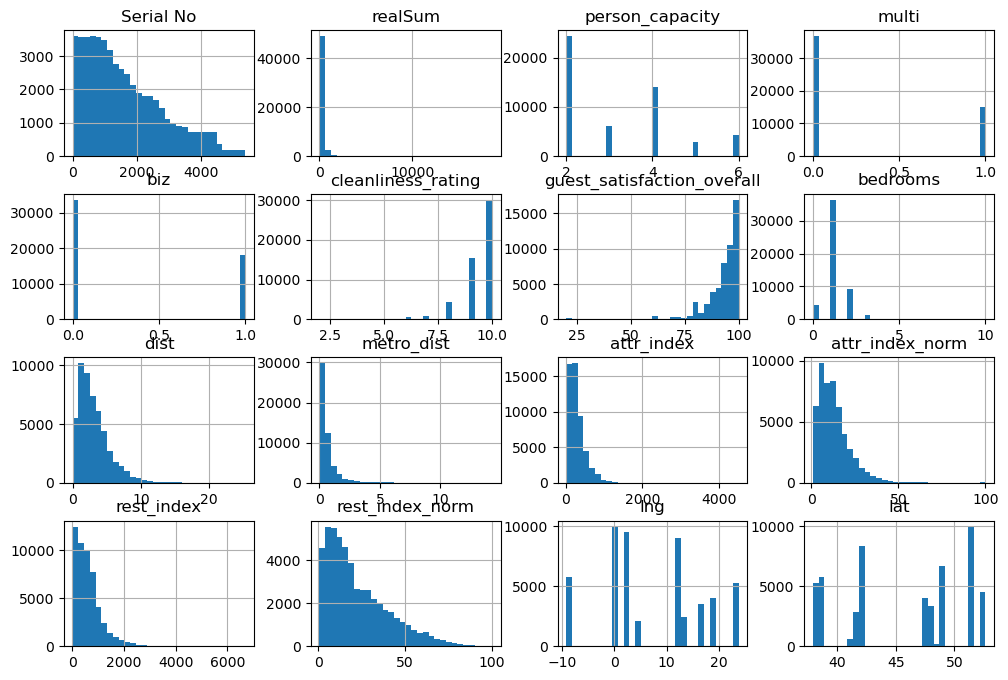

In [42]:
combine_df.hist(figsize=(12,8),bins=(30))

plt.show()

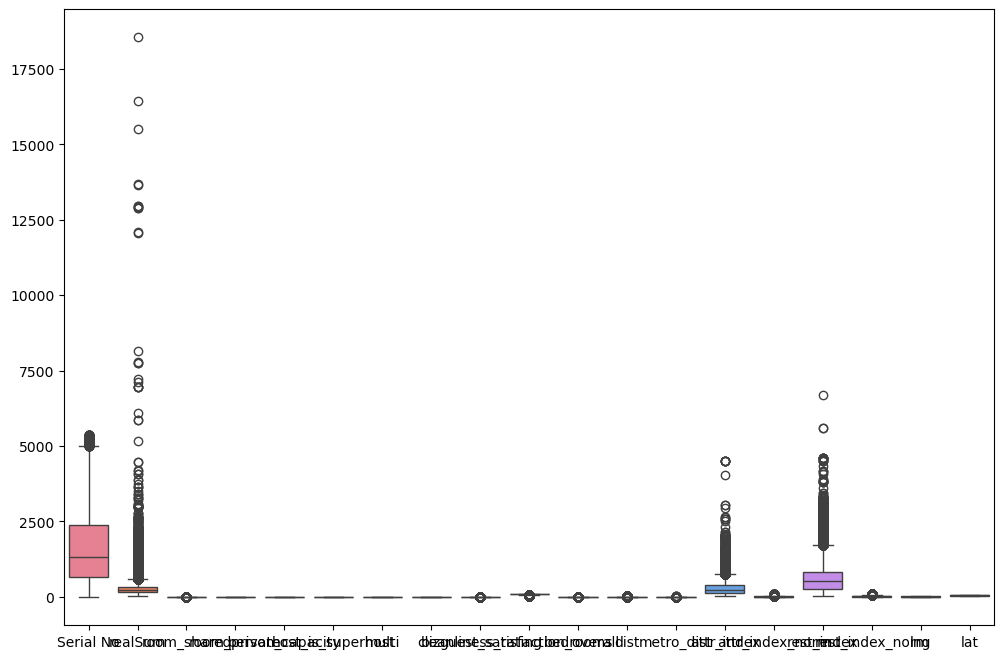

In [44]:
plt.figure(figsize=(12,8))
sns.boxplot(data=combine_df)
plt.show()

In [48]:
combine_df.to_csv("cleaned_data.csv",index=False)
print("data saved succesfully")

data saved succesfully


In [49]:
print(os.getcwd())

C:\Users\visha\POWER_BI_Project


In [53]:
new_data=pd.read_csv("cleaned_data.csv")
new_data.head()

,Serial No,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [54]:
file_path = os.path.abspath("cleaned_data.csv")
print("File saved at:", file_path)


File saved at: C:\Users\visha\POWER_BI_Project\cleaned_data.csv


In [64]:
#Connecting mysql server


In [65]:
host="localhost"
user="root"
password="root"
database="Airbnb_Database"

In [66]:
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")

In [67]:
try:
    with engine.connect() as connection:
        print("✅ Connected to MySQL successfully!")
except Exception as e:
    print("❌ Error connecting to MySQL:", e)

✅ Connected to MySQL successfully!


In [68]:
#load data cleanedcsv
new_data=pd.read_csv("cleaned_data.csv")
new_data.head()


,Serial No,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [69]:
#give this to a table name
table_name="Airbnb_data"

In [71]:
new_data.to_sql(table_name,con=engine,if_exists="replace",index=False)
print(f"✅ Data successfully loaded into MySQL table: {table_name}")

✅ Data successfully loaded into MySQL table: Airbnb_data


C:\Users\visha\AppData\Local\Temp\ipykernel_11244\1623479231.py:1: UserWarning: The provided table name 'Airbnb_data' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  new_data.to_sql(table_name,con=engine,if_exists="replace",index=False)
